<a href="https://colab.research.google.com/github/AkshadPawar/oibsip_taskno_5/blob/main/Level_2_(1)_Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data Analist intership/Housing.csv')

# Display basic information about the dataset
print(df.info())

# Check the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

In [ ]:
# Convert categorical columns to numerical using encoding
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 0})

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']

print(X.head())


   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 1  
1                0                1        3         0                 1  
2                0                0        2         1                 2  
3                0                1        3         1                 1  
4                0                1        2         0                 1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1747758260816.2134
R-squared: 0.6542221839581839


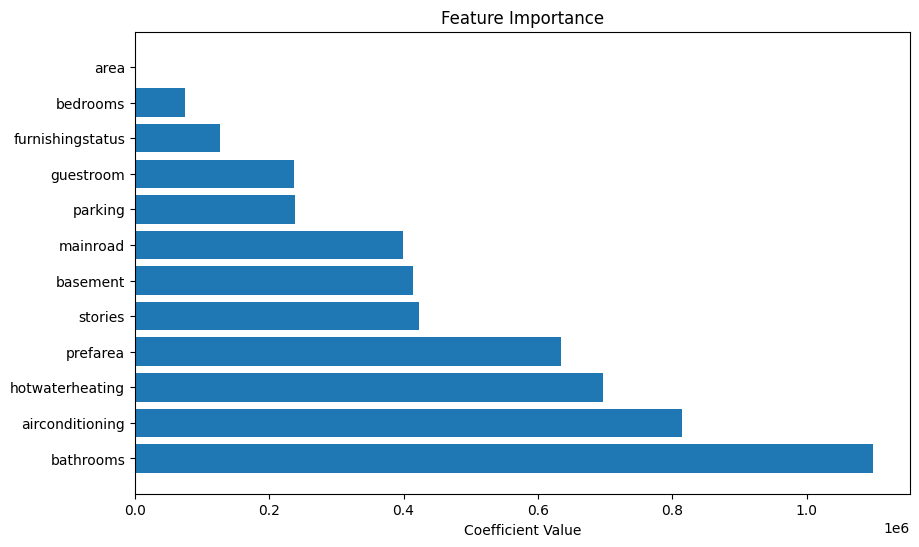

In [ ]:
# Plot feature importance (coefficients)
coefficients = model.coef_
features = X.columns

# Create a dataframe for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Visualize the feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


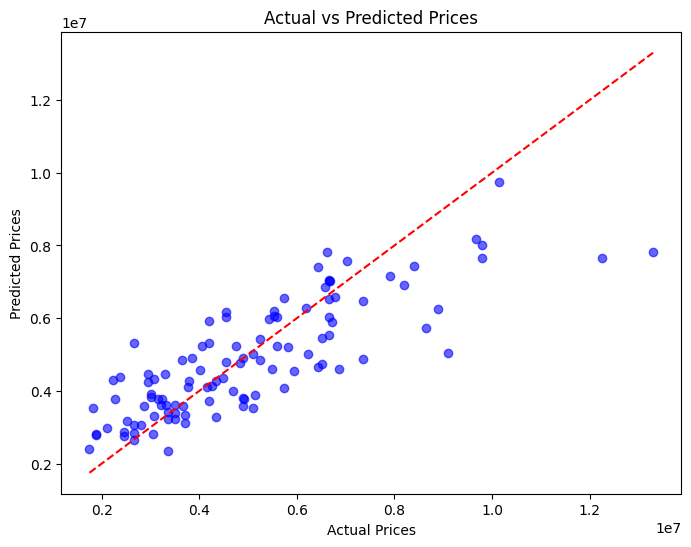

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


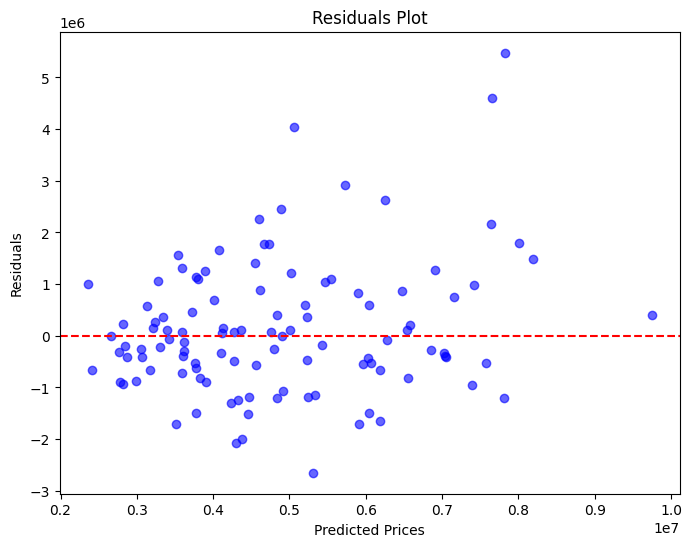

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [ -2.13742954  -5.31960313 -16.84817515 -20.27856931  -5.386108  ]
Mean cross-validation score: -9.993977025888995


In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate Ridge Regression
ridge_predictions = ridge_model.predict(X_test)
print(f"R-squared for Ridge Regression: {ridge_model.score(X_test, y_test)}")


R-squared for Ridge Regression: 0.6537489570750137


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
selector = RFE(lr_model, n_features_to_select=5)
X_rfe = selector.fit_transform(X, y)

# Fit the model with selected features
lr_model.fit(X_rfe, y)

# Print the features selected
print(f"Selected Features: {X.columns[selector.support_]}")


Selected Features: Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')


In [ ]:
# Updated feature set
X_selected = X[['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning', 'prefarea']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['price'], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2652927097269.1426
R-squared: 0.4751428968308903


In [ ]:
# Initialize RFE with the linear regression model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE model to the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')


In [ ]:
# Selecting only the relevant features for training
X_selected = X[['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning', 'prefarea']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 2652927097269.1426
R-squared: 0.4751428968308903
